In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

ftse_volatility_df = pd.read_csv('files/1.1-FTSE_VOL-PRICES_2006-2023.csv')
ftse_index_volatility_df = pd.read_csv('files/1.1-FTSE-IDX_VOL-PRICES_2006-2023.csv')
ftse_index_volatility_df = ftse_index_volatility_df.iloc[:, 1:]

ftse_index_volatility_df['Date'] = pd.to_datetime(ftse_index_volatility_df['Date'])
ftse_volatility_df['Date'] = pd.to_datetime(ftse_volatility_df['Date'])

In [2]:
cols_idx = ['Name','Date','Close', 'V^CC', 'V^RS', 'V^YZ', 'Return']
cols = ['Asset','Date','Close', 'V^CC', 'V^RS', 'V^YZ', 'Return']

In [3]:
index_simply_df = ftse_index_volatility_df[cols_idx]
ftse_simply_df = ftse_volatility_df[cols]

index_simply_df = index_simply_df.rename(columns={'Name':'Asset'})

In [4]:
ftse_dates_only = ftse_index_volatility_df.Date.tolist()

In [5]:
merge_simply_df = pd.concat([index_simply_df, ftse_simply_df])
merge_simply_df = merge_simply_df[merge_simply_df.Date.isin(ftse_dates_only)]

In [6]:
merge_simply_df = merge_simply_df[merge_simply_df['V^YZ'].notnull()]

In [7]:
pivot_return_df = pd.pivot_table(merge_simply_df, index = 'Date', columns='Asset', values='Return')
pivot_YZ_df = pd.pivot_table(merge_simply_df, index = 'Date', columns='Asset', values='V^YZ')

In [8]:
completed_stocks_lists = pivot_return_df.dropna(axis=1).columns.tolist()

In [9]:
agg_volatility = pd.DataFrame(pivot_return_df.abs().max(), columns=['Values'])
agg_volatility = agg_volatility.sort_values('Values', ascending=False).reset_index()

In [13]:
ftse_volatility_df[ftse_volatility_df.Asset == 8589934333].iloc[:200].to_csv('files/barclays_inspection.csv', index=None)

In [17]:
# vanquis check price
pivot_return_df[[4295896565, '^FTSE']]

Asset,4295896565,^FTSE
Date,,
2006-01-10,NaN,-0.007450
2006-01-11,NaN,0.007506
2006-01-12,NaN,0.000646
2006-01-13,NaN,-0.004220
2006-01-16,NaN,0.005113
...,...,...
2023-04-24,NaN,-0.000240
2023-04-25,NaN,-0.002667
2023-04-26,NaN,-0.004879


In [19]:
pivot_YZ_df[[4295896565, '^FTSE']].to_csv('files/vanquis_inspection.csv')

In [23]:
agg_volatility

,Asset,Values
0,8589934333,0.732422
1,4295896428,0.715885
2,8589934212,0.665706
3,4295896565,0.662178
4,5036206981,0.560120
...,...,...
206,4295895849,0.054696
207,4295894991,0.044325
208,4295898863,0.041975
209,4295899119,0.041134


In [ ]:
vol = np.round(agg_volatility[agg_volatility['Asset'] == 8589934333].Values[0],2)

In [63]:
data1 = pivot_all_df[[8589934333]].dropna()

In [80]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np

'BARC'

In [32]:
np.round(agg_volatility[agg_volatility['Asset'] == asset].Values,2).iloc[0]

0.11

In [38]:
ftse_volatility_df.head()

,Month,Date,Asset,Currency,PermID,Ticker,RIC,Open,High,Low,Close,Volume,UnadjClose,Jump,Group,Return,Close_t-1,O_i,u_i,d_i,c_i,V^O,V^C,temp_RS,V^CC,V^RS,V^YZ
0,2006-01-01,2006-01-03,4295856631,AUD,4295856631,BXB,BXB.AX,9.384185,9.486490,9.365584,9.486490,2.503309e+06,10.20,False,0,NaN,NaN,NaN,0.010843,-0.001984,0.010843,NaN,NaN,0.000025,NaN,NaN,NaN
1,2006-01-01,2006-01-04,4295856631,AUD,4295856631,BXB,BXB.AX,9.505091,9.663199,9.505091,9.616697,2.410045e+06,10.34,False,0,0.013725,9.486490,0.001959,0.016497,0.000000,0.011673,NaN,NaN,0.000080,NaN,NaN,NaN
2,2006-01-01,2006-01-05,4295856631,AUD,4295856631,BXB,BXB.AX,9.700401,9.746904,9.625997,9.663199,4.212039e+06,10.39,False,0,0.004836,9.616697,0.008666,0.004782,-0.007700,-0.003842,NaN,NaN,0.000071,NaN,NaN,NaN
3,2006-01-01,2006-01-06,4295856631,AUD,4295856631,BXB,BXB.AX,9.598096,9.616697,9.505091,9.560894,3.953997e+06,10.28,False,0,-0.010587,9.663199,-0.006760,0.001936,-0.009737,-0.003884,NaN,NaN,0.000068,NaN,NaN,NaN
4,2006-01-01,2006-01-09,4295856631,AUD,4295856631,BXB,BXB.AX,9.598096,9.653899,9.598096,9.625997,3.145075e+06,10.35,False,0,0.006809,9.560894,0.003884,0.005797,0.000000,0.002903,NaN,0.007575,0.000017,NaN,0.007225,NaN


In [39]:
def vis_dual_histogram(df, asset = 8589934333, colour = 'orange'):

    data1 = df[[asset]].dropna()
    date_lists = data1.index.tolist()
    data1 = data1.iloc[:, 0].tolist()

    vol = np.round(agg_volatility[agg_volatility['Asset'] == asset].Values,2).iloc[0]

    name_stock = ftse_volatility_df[ftse_volatility_df['Asset'] == asset].iloc[0,6]

    data2 = df[['^FTSE']].dropna()
    data2 = data2[data2.index.isin(date_lists)]
    data2 = data2.iloc[:, 0].tolist()

    # Determine the overall range of the data to dictate bin edges
    min_val = min(min(data1), min(data2))
    max_val = max(max(data1), max(data2))

    # Create bin edges. Here we decide to have 30 bins
    bins = np.linspace(min_val, max_val, 200)

    # Create a new figure
    plt.figure()

    # Draw the second histogram. The alpha parameter controls the transparency.
    plt.hist(data2, bins=bins, color='grey', label='^FTSE')

    # Draw the first histogram
    plt.hist(data1, bins=bins, color=colour, alpha=0.3, label=name_stock)

    plt.xlim(-0.2, 0.2)

    plt.grid(False)

    plt.text(0.6, 0.6, f'σ={vol}', transform=plt.gca().transAxes, bbox=dict(facecolor='orange', alpha=0.3, edgecolor='black', boxstyle='round,pad=0.2'))

    # Add a legend
    plt.legend()

    # Show the figure
    plt.show()

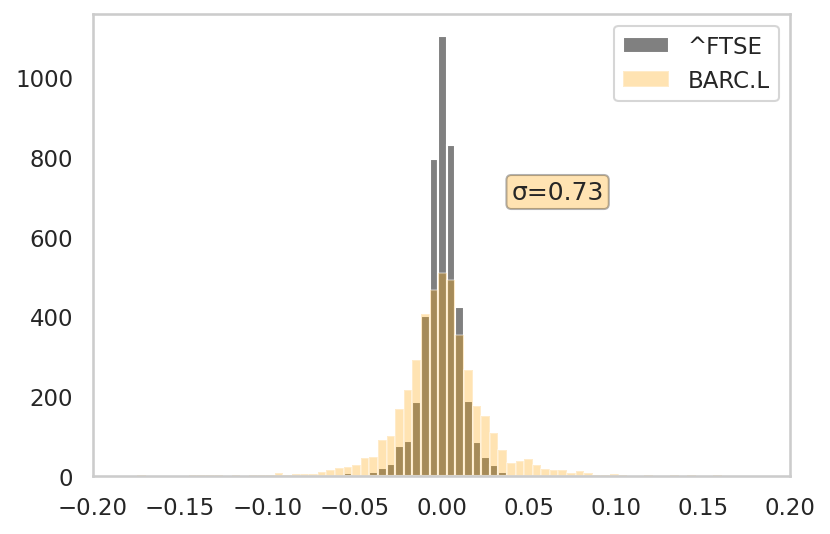

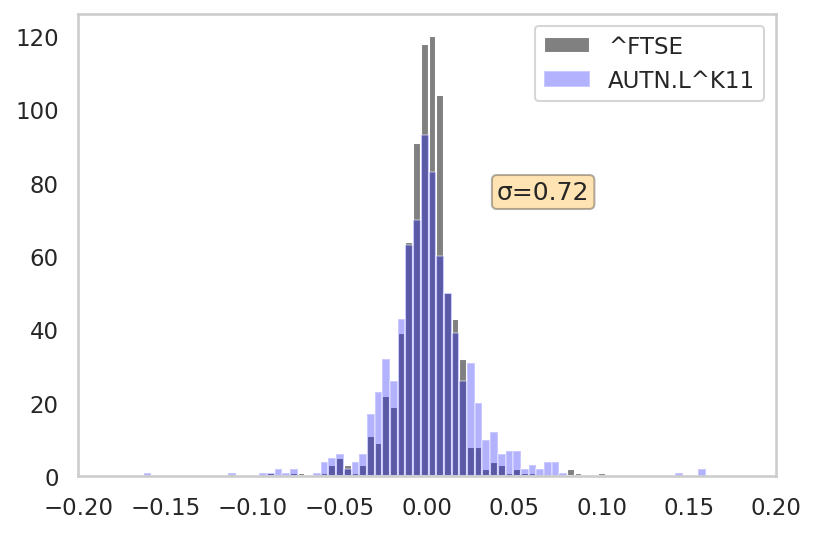

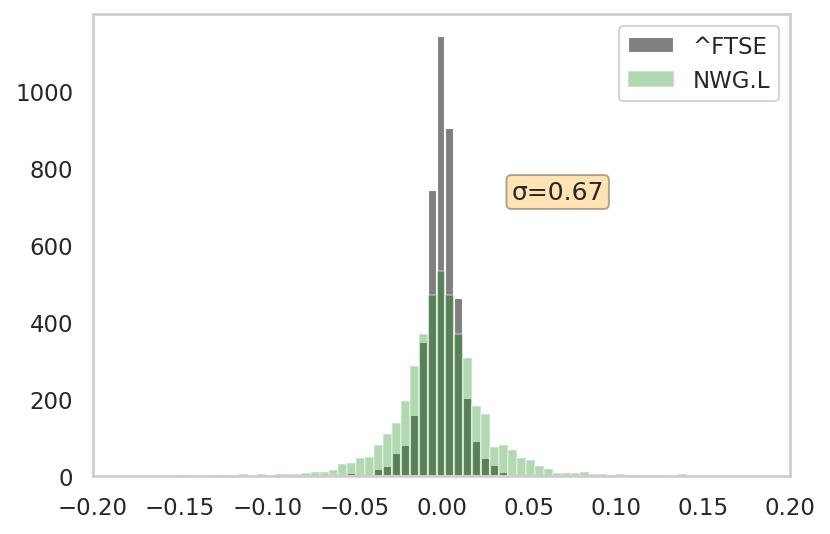

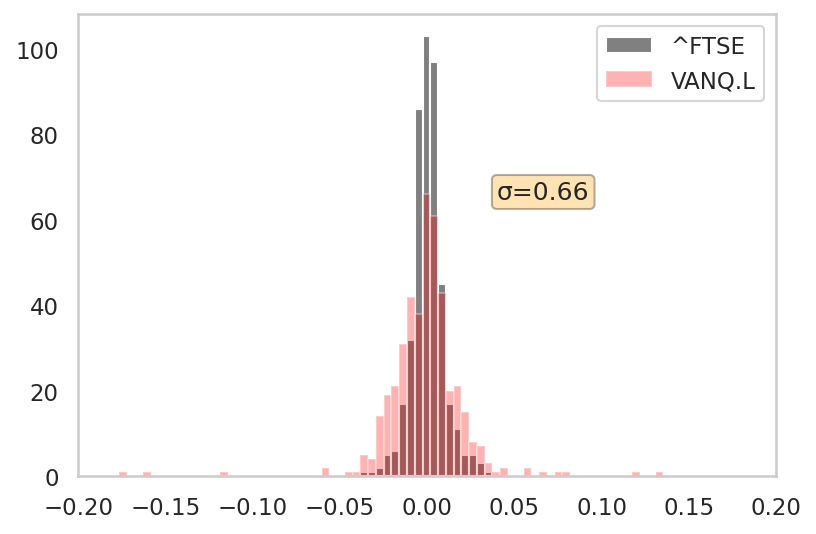

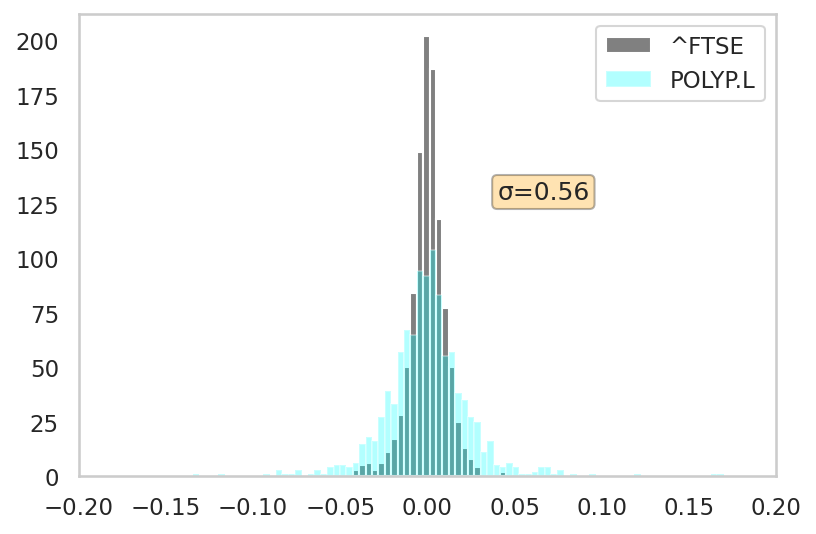

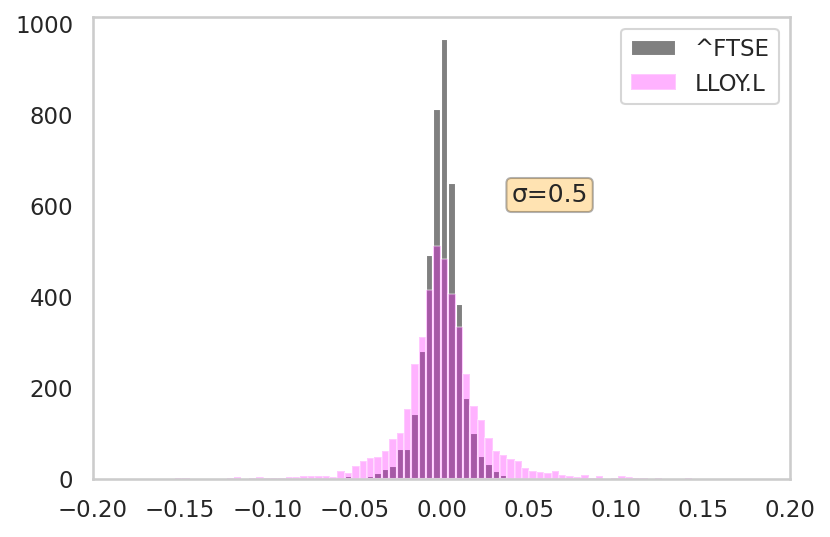

In [41]:
for _, asset in enumerate(agg_volatility.Asset.tolist()[:6]):
    colour = ['orange','blue','green','red','cyan','magenta','purple']
                          
    vis_dual_histogram(pivot_return_df, asset, colour[_])

In [2]:
import pandas as pd

# Define the data
data = {'Price': [150, 151, 152, 200, 201, 202]}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a multi-index
df.index = pd.MultiIndex.from_product([['Apple', 'Microsoft'], ['2023-07-01', '2023-07-02', '2023-07-03']], 
                                       names=['Company', 'Date'])

print(df)


                      Price
Company   Date             
Apple     2023-07-01    150
          2023-07-02    151
          2023-07-03    152
Microsoft 2023-07-01    200
          2023-07-02    201
          2023-07-03    202


In [3]:
df

Price
Company   Date             
Apple     2023-07-01    150
          2023-07-02    151
          2023-07-03    152
Microsoft 2023-07-01    200
          2023-07-02    201
          2023-07-03    202